In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [2]:
#read the data file

dataT=pd.read_csv('Toyoto_corrola.csv')
dataT

,Id,Model,Price,Age_08_04,KM,HP,cc,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,2000,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,2000,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,2000,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,2000,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,1300,3,4,5,1025
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,1300,3,4,5,1015
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,1300,3,4,5,1015
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,1300,3,4,5,1015


In [3]:
dataT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1436 non-null   int64 
 1   Model      1436 non-null   object
 2   Price      1436 non-null   int64 
 3   Age_08_04  1436 non-null   int64 
 4   KM         1436 non-null   int64 
 5   HP         1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [4]:
dataT1=dataT.iloc[:,2:]
dataT1

,Price,Age_08_04,KM,HP,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,2000,3,4,5,1165
1,13750,23,72937,90,2000,3,4,5,1165
2,13950,24,41711,90,2000,3,4,5,1165
3,14950,26,48000,90,2000,3,4,5,1165
4,13750,30,38500,90,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,4,5,1025
1432,10845,72,19000,86,1300,3,4,5,1015
1433,8500,71,17016,86,1300,3,4,5,1015
1434,7250,70,16916,86,1300,3,4,5,1015


In [5]:
#dataT2=dataT1.drop('Cylinders',axis=1)
#dataT2

In [6]:
dataT1.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,NaN,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,NaN,0.209477,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,NaN,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,NaN,0.020613,1.000000


In [7]:
#Scatterplot between variables along with histograms

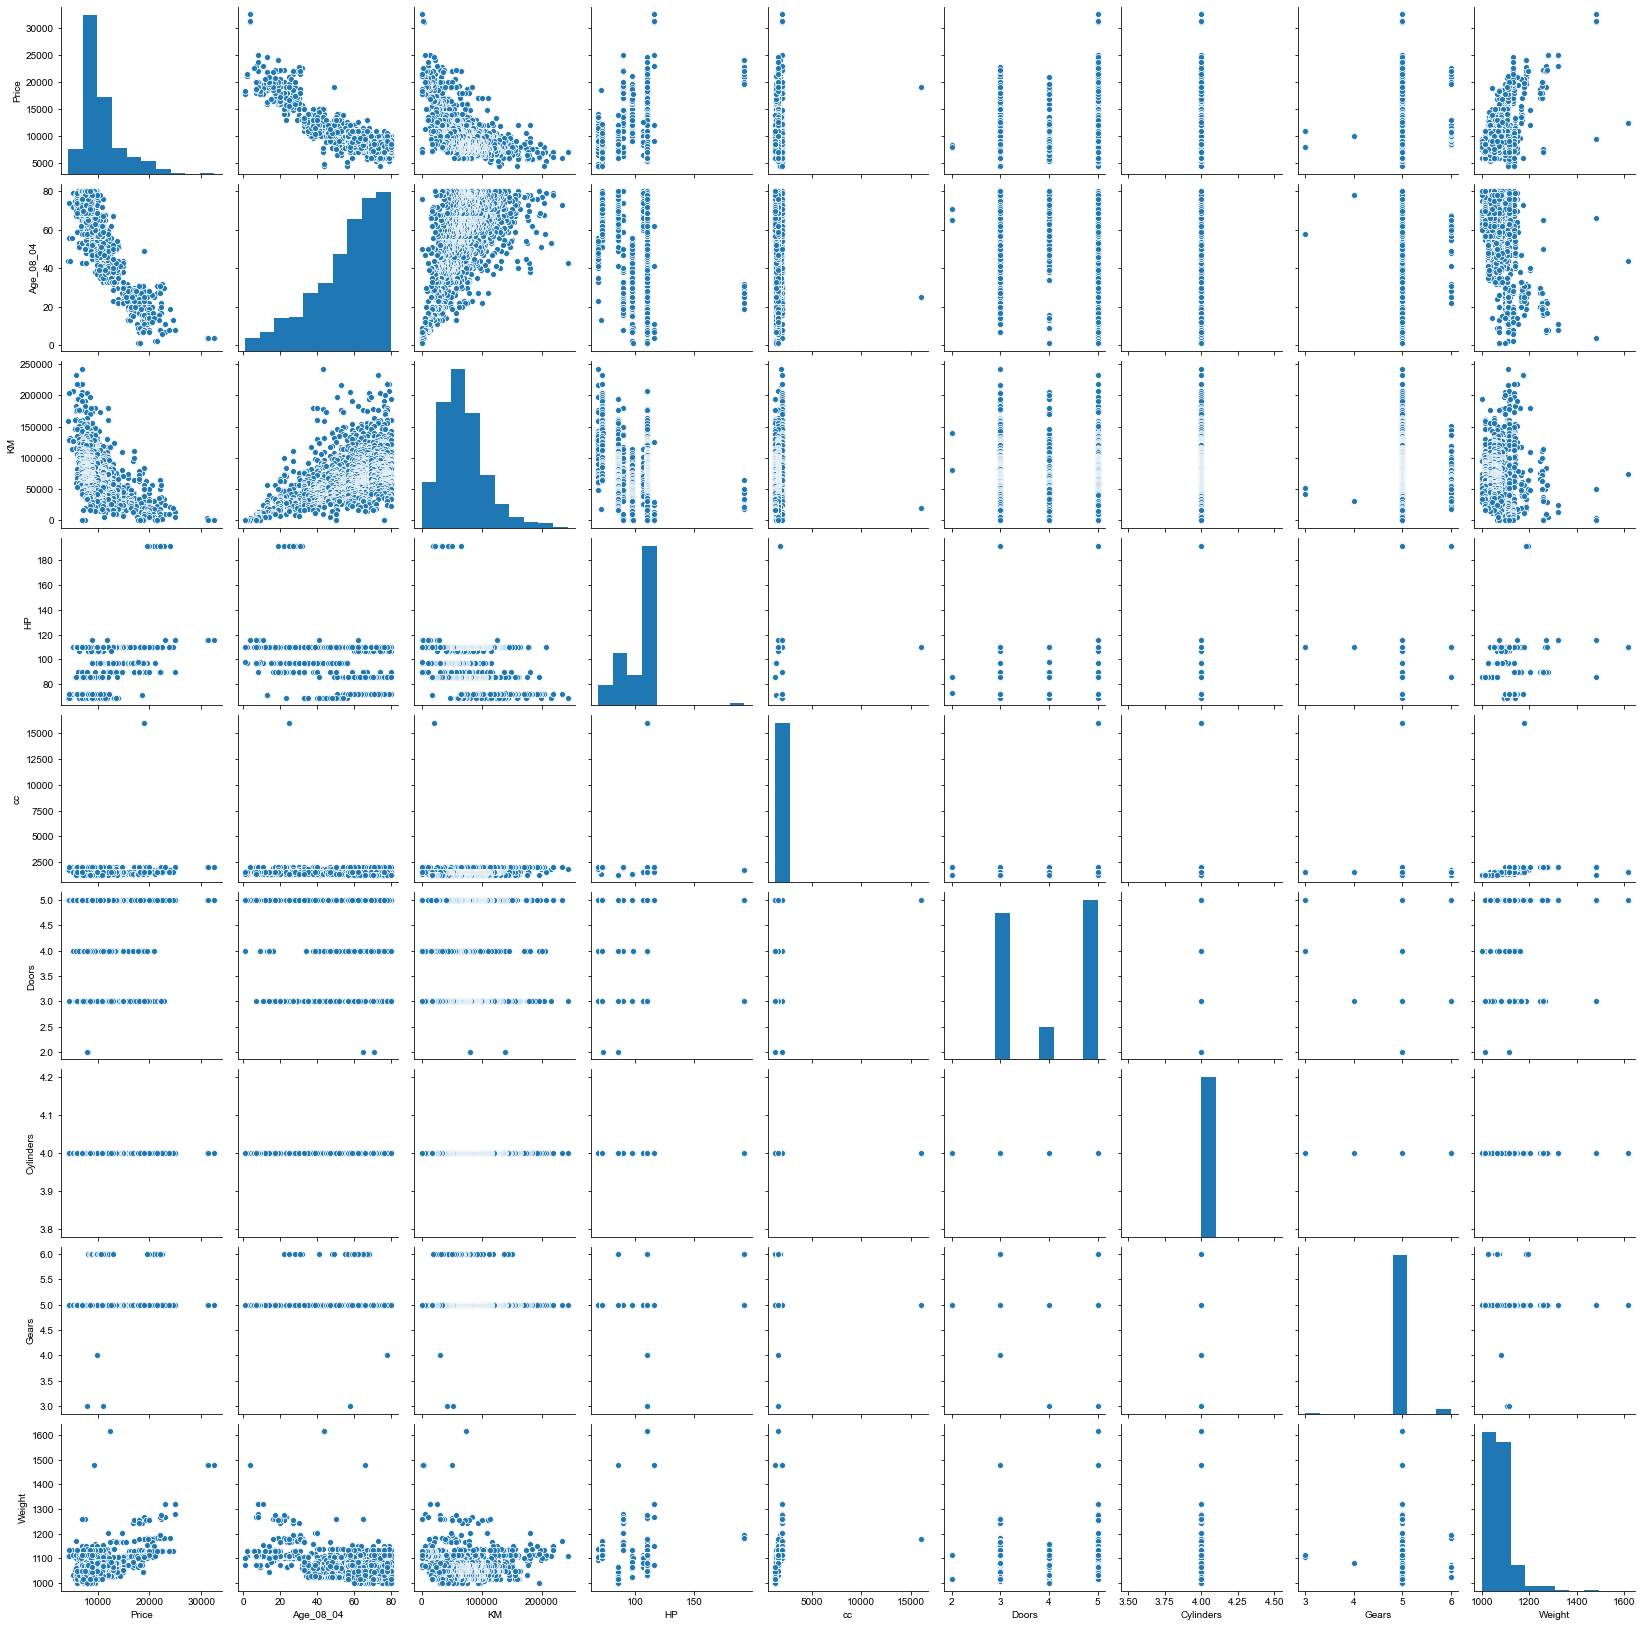

In [8]:
sns.pairplot(dataT1)#scatter plot for all the variables
sns.set_style(style='darkgrid')

In [9]:
dataT2 = dataT1.rename({'Age_08_04': 'Age','Cylinders':"CC"}, axis=1)
dataT2

,Price,Age,KM,HP,cc,Doors,CC,Gears,Weight
0,13500,23,46986,90,2000,3,4,5,1165
1,13750,23,72937,90,2000,3,4,5,1165
2,13950,24,41711,90,2000,3,4,5,1165
3,14950,26,48000,90,2000,3,4,5,1165
4,13750,30,38500,90,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,4,5,1025
1432,10845,72,19000,86,1300,3,4,5,1015
1433,8500,71,17016,86,1300,3,4,5,1015
1434,7250,70,16916,86,1300,3,4,5,1015


In [14]:
#build model
#Y=Bo+B1.x1+B2.x2+B3.x3+B4.x4+....+e
#Price=Bo+B1.Age+B2.km+B3.HP+B4.doors+B5.gears+B6.wt
import statsmodels.formula.api as smf
model=smf.ols('Price~Age+KM+HP+Doors+CC+Gears+Weight+cc',data=dataT2).fit()
model

In [15]:
model.params

Intercept    -418.630217
Age          -122.234520
KM             -0.019867
HP             28.480905
Doors         -10.679443
CC          -1674.520867
Gears         620.416571
Weight         18.854232
cc             -0.088120
dtype: float64

In [16]:
model.tvalues , np.round(model.pvalues,5)

(Intercept    -5.395759
 Age         -46.725228
 KM          -16.344309
 HP           10.878217
 Doors        -0.266951
 CC           -5.395759
 Gears         3.142596
 Weight       21.781234
 cc           -0.982650
 dtype: float64,
 Intercept    0.00000
 Age          0.00000
 KM           0.00000
 HP           0.00000
 Doors        0.78955
 CC           0.00000
 Gears        0.00171
 Weight       0.00000
 cc           0.32595
 dtype: float64)

In [17]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8628951602234527, 0.8622230776755284)

the P value of cc & Doors are more than alpha value

In [ ]:
#Colliniarity

In [18]:
slr_d=smf.ols('Price~Doors',data=dataT2).fit()
slr_d.tvalues,np.round(slr_d.pvalues,5)

(Intercept    19.258097
 Doors         7.141657
 dtype: float64,
 Intercept    0.0
 Doors        0.0
 dtype: float64)

In [19]:
slr_c=smf.ols('Price~cc',data=dataT2).fit()
slr_c.tvalues,np.round(slr_c.pvalues,5)

(Intercept    24.694090
 cc            4.824822
 dtype: float64,
 Intercept    0.0
 cc           0.0
 dtype: float64)

In [20]:
slr_c_d=smf.ols('Price~cc+Doors',data=dataT2).fit()
slr_c_d.tvalues,np.round(slr_c_d.pvalues,5)

(Intercept    12.620704
 cc            4.340400
 Doors         6.816153
 dtype: float64,
 Intercept    0.00000
 cc           0.00002
 Doors        0.00000
 dtype: float64)

# VIF

In [21]:
dataT2.head()

,Price,Age,KM,HP,cc,Doors,CC,Gears,Weight
0,13500,23,46986,90,2000,3,4,5,1165
1,13750,23,72937,90,2000,3,4,5,1165
2,13950,24,41711,90,2000,3,4,5,1165
3,14950,26,48000,90,2000,3,4,5,1165
4,13750,30,38500,90,2000,3,4,5,1170


We need to calculate VIF with each variable except Price

Age~KM+HP+cc+Doors+CC+Gears+Weight like that

In [23]:
rsq_Age = smf.ols('Age~KM+HP+cc+Doors+CC+Gears+Weight',data=dataT2).fit().rsquared  
vif_Age = 1/(1-rsq_Age)
vif_Age

1.8745586232537743

In [24]:
rsq_KM = smf.ols('KM~Age+HP+cc+Doors+CC+Gears+Weight',data=dataT2).fit().rsquared  
vif_KM = 1/(1-rsq_KM)
vif_KM

1.6456176224341288

In [26]:
rsq_HP = smf.ols('HP~Age+KM+cc+Doors+CC+Gears+Weight',data=dataT2).fit().rsquared  
vif_HP = 1/(1-rsq_HP)
vif_HP

1.218055611283053

In [29]:
rsq_cc = smf.ols('cc~Age+KM+HP+Doors+CC+Gears+Weight',data=dataT2).fit().rsquared  
vif_cc = 1/(1-rsq_cc)
vif_cc

1.1467290955873182

In [30]:
rsq_Doors = smf.ols('Doors~Age+KM+HP+cc+CC+Gears+Weight',data=dataT2).fit().rsquared  
vif_Doors = 1/(1-rsq_Doors)
vif_Doors

1.1500436488844807

In [31]:
rsq_CC = smf.ols('CC~Age+KM+HP+cc+Doors+Gears+Weight',data=dataT2).fit().rsquared  
vif_CC = 1/(1-rsq_CC)
vif_CC

C:\Users\rohi\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


0.0

In [32]:
rsq_Gears = smf.ols('Gears~Age+KM+HP+cc+Doors+CC+Weight',data=dataT2).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears)
vif_Gears

1.0966025078747645

In [33]:
rsq_Weight = smf.ols('Weight~Age+KM+HP+cc+Doors+CC+Gears',data=dataT2).fit().rsquared  
vif_Weight = 1/(1-rsq_Weight)
vif_Weight

1.643961944386224

In [36]:
# Putting the values in Dataframe format
d1={'Variables':['Age','KM','HP','CC','Doors','Gears','cc','Weight'],
    'Vif':[vif_Age,vif_KM,vif_HP,vif_CC,vif_Doors,vif_Gears,vif_cc,vif_Weight]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.874559
1,KM,1.645618
2,HP,1.218056
3,CC,0.000000
4,Doors,1.150044
5,Gears,1.096603
6,cc,1.146729
7,Weight,1.643962


In [ ]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

# Residual Analysis

# Test for Normality of Residuals (Q-Q Plot) 

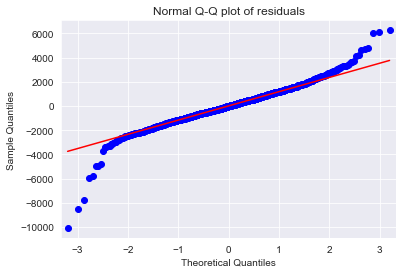

In [37]:
import statsmodels.api as sm   # Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [38]:
list(np.where(model.resid>6000))

[array([109, 147, 523], dtype=int64)]

In [39]:
list(np.where(model.resid<-6000))

[array([221, 601, 960], dtype=int64)]

# Residual Plot for Homoscedasticity

In [43]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def get_standardized_values(vals) :
    return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

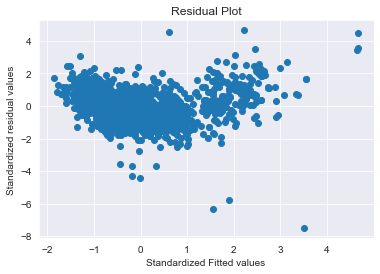

In [44]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

In [ ]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

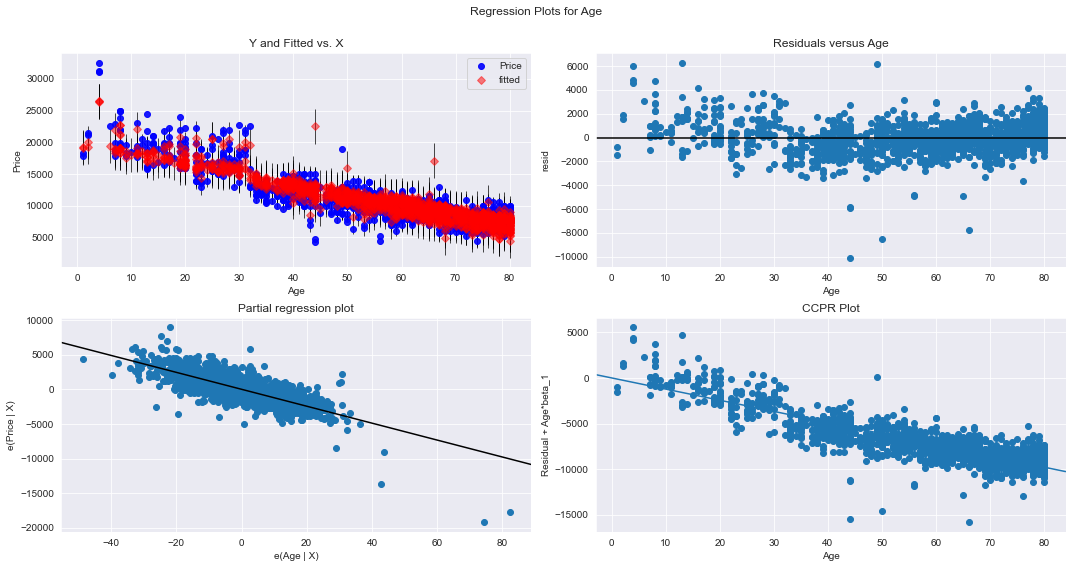

In [45]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

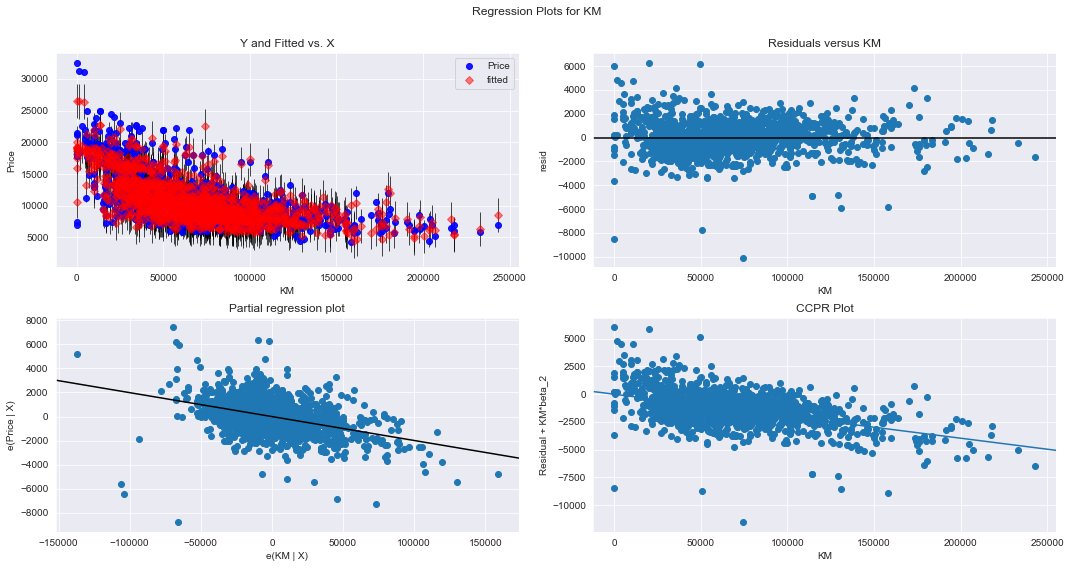

In [46]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

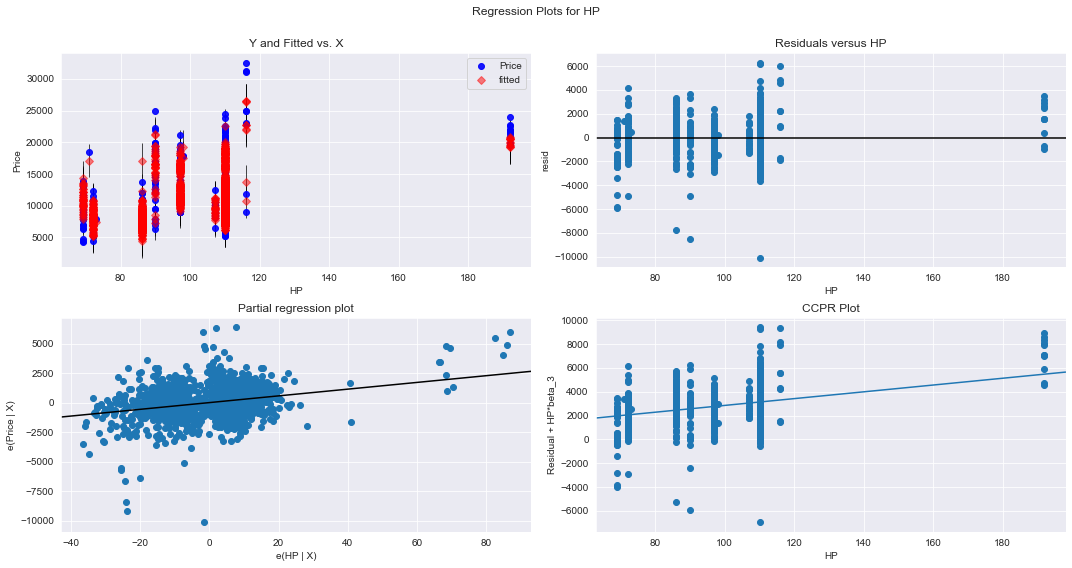

In [47]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

ValueError: specify slope and intercepty or model_results

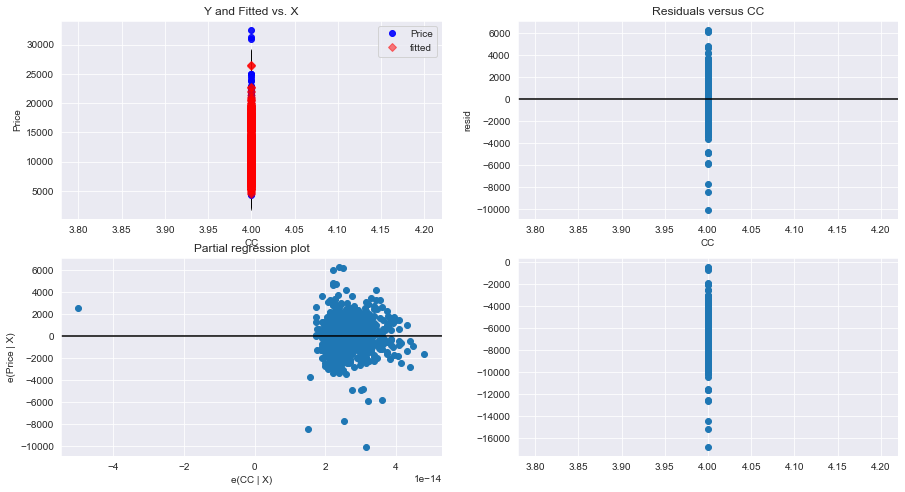

In [48]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "CC", fig=fig)
plt.show()

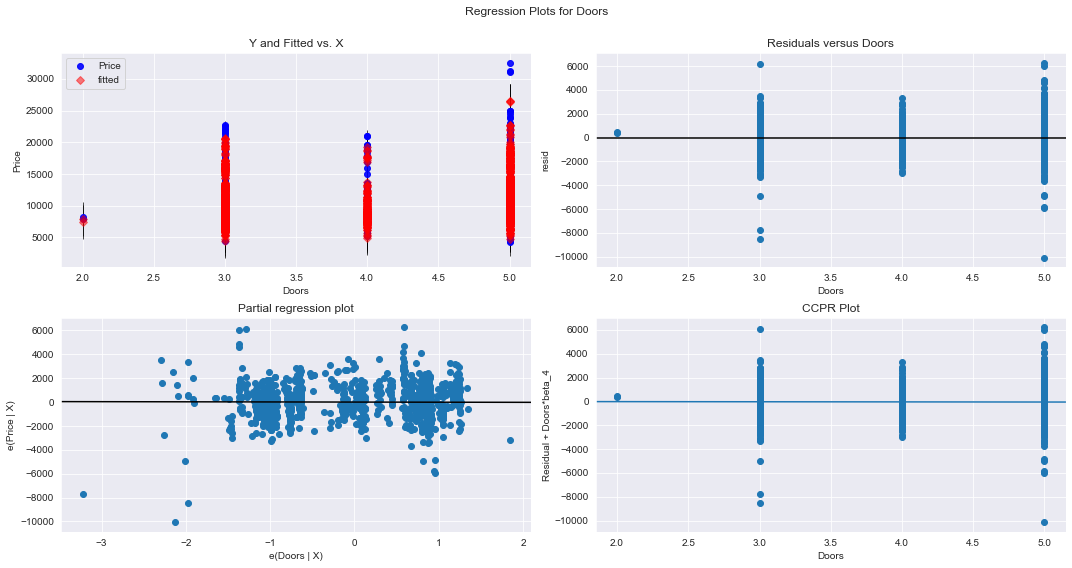

In [49]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

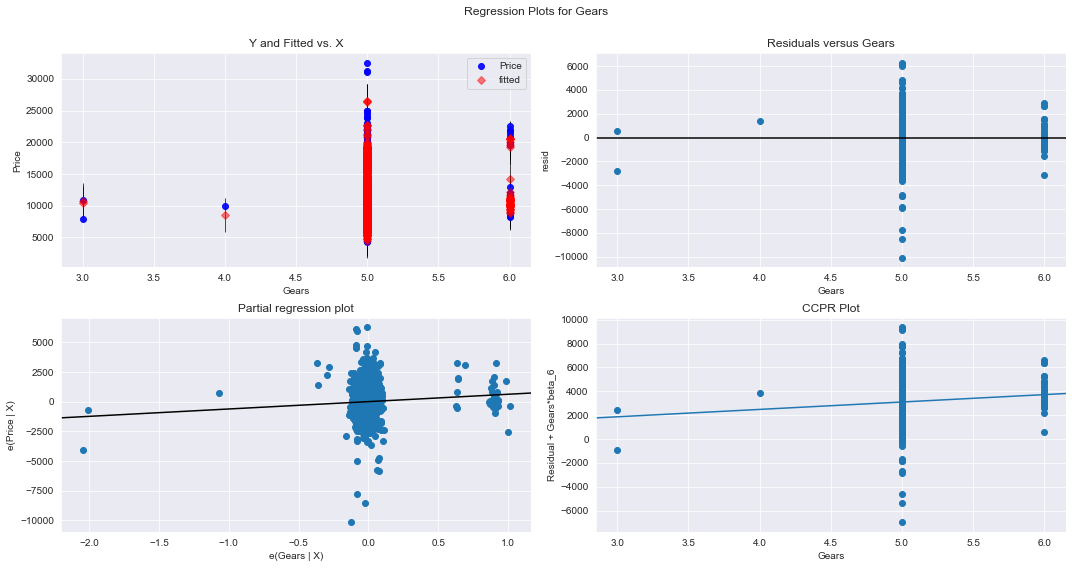

In [50]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

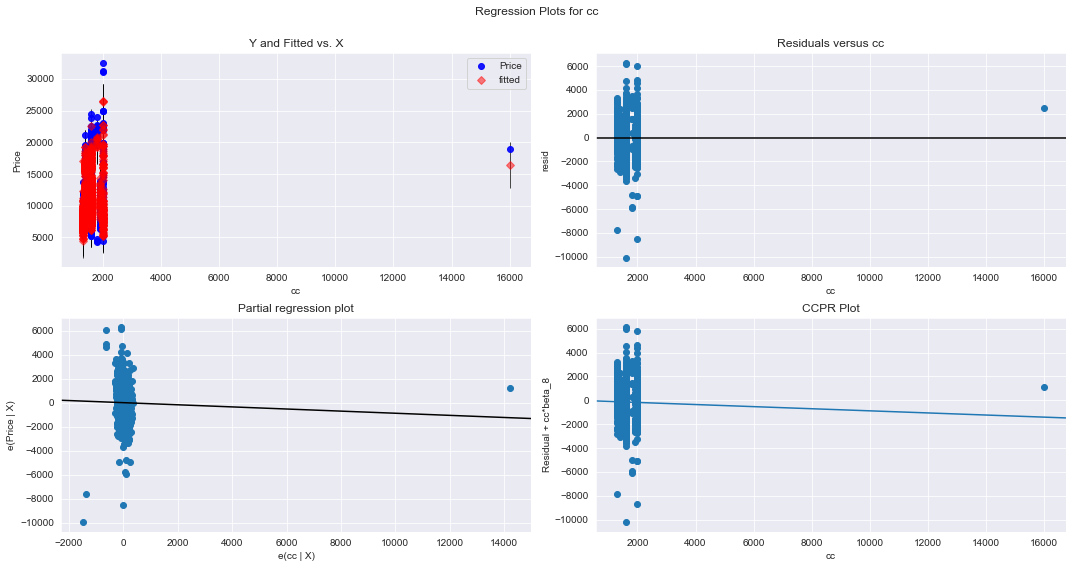

In [51]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

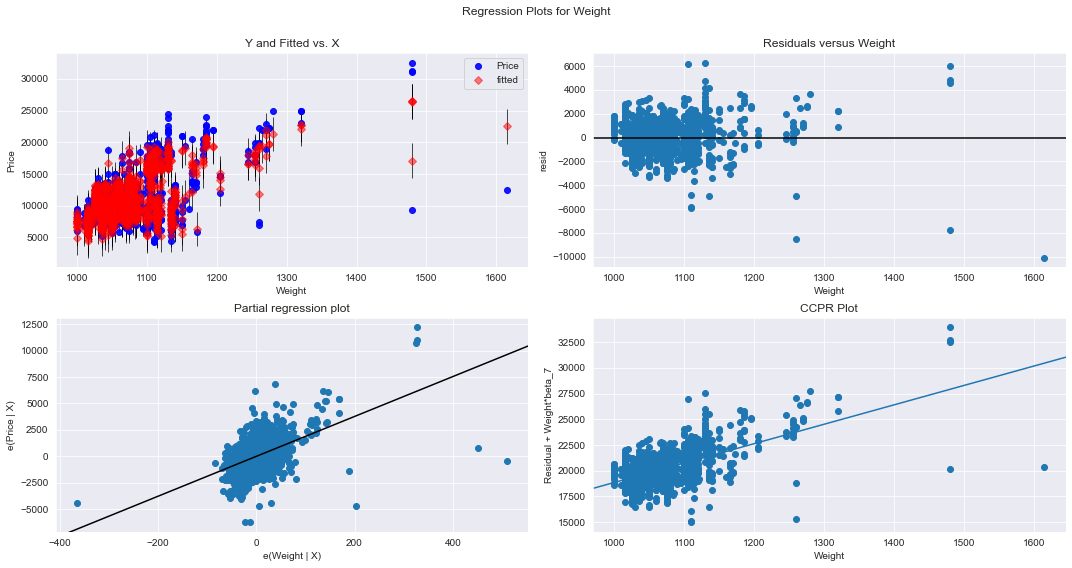

In [52]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

# Model Deletion Diagnostics

Detecting Influencers/Outliers

Cook’s Distance

In [53]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance  
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance

<ipython-input-54-db4dd9a40df7>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(dataT2)), np.round(c, 3))


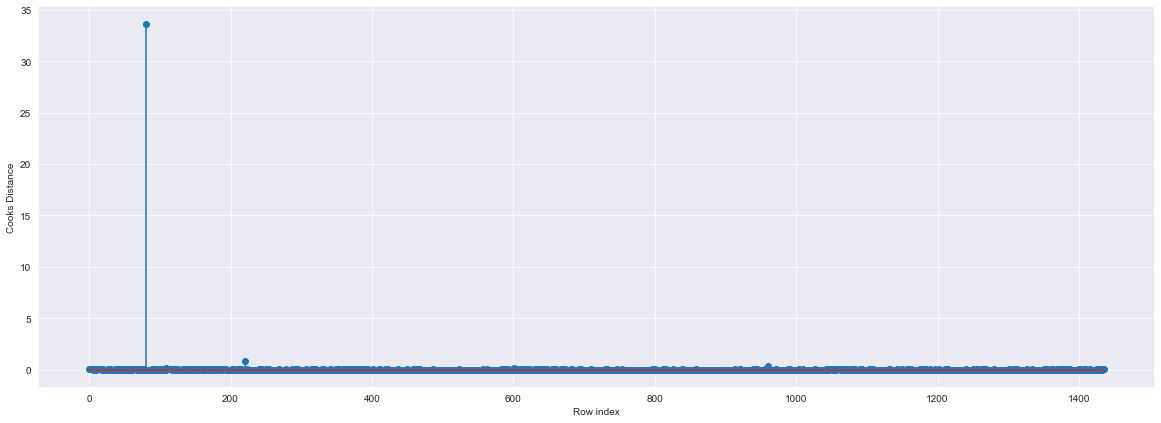

In [54]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(dataT2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [55]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 33.66414325438346)

# High Influence points

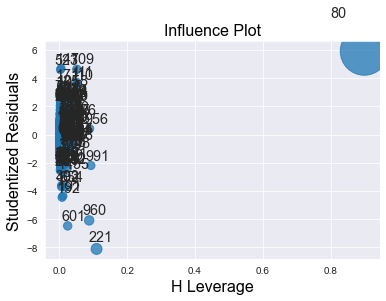

In [56]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [58]:
k = dataT2.shape[1]
n = dataT2.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020891364902506964

In [61]:
dataT2[dataT2.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,CC,Gears,Weight
80,18950,25,20019,110,16000,5,4,5,1180


In [63]:
dataT2.head()

,Price,Age,KM,HP,cc,Doors,CC,Gears,Weight
0,13500,23,46986,90,2000,3,4,5,1165
1,13750,23,72937,90,2000,3,4,5,1165
2,13950,24,41711,90,2000,3,4,5,1165
3,14950,26,48000,90,2000,3,4,5,1165
4,13750,30,38500,90,2000,3,4,5,1170


In [64]:
dataT2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   CC      1436 non-null   int64
 7   Gears   1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


# Improving the Model

In [71]:
#dataT_new=pd.read_csv('Toyoto_corrola.csv')
dataT_new=dataT2.copy()

In [72]:
#Discard the data points which are influencers and reasign the row number (reset_index())
dataT4=dataT_new.drop(dataT_new.index[80],axis=0).reset_index()
dataT4

,index,Price,Age,KM,HP,cc,Doors,CC,Gears,Weight
0,0,13500,23,46986,90,2000,3,4,5,1165
1,1,13750,23,72937,90,2000,3,4,5,1165
2,2,13950,24,41711,90,2000,3,4,5,1165
3,3,14950,26,48000,90,2000,3,4,5,1165
4,4,13750,30,38500,90,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,4,5,1025
1431,1432,10845,72,19000,86,1300,3,4,5,1015
1432,1433,8500,71,17016,86,1300,3,4,5,1015
1433,1434,7250,70,16916,86,1300,3,4,5,1015


In [73]:
dataT4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   index   1435 non-null   int64
 1   Price   1435 non-null   int64
 2   Age     1435 non-null   int64
 3   KM      1435 non-null   int64
 4   HP      1435 non-null   int64
 5   cc      1435 non-null   int64
 6   Doors   1435 non-null   int64
 7   CC      1435 non-null   int64
 8   Gears   1435 non-null   int64
 9   Weight  1435 non-null   int64
dtypes: int64(10)
memory usage: 112.2 KB


In [74]:
#Drop the original index
dataT4=dataT4.drop(['index'],axis=1)

In [75]:
dataT4

,Price,Age,KM,HP,cc,Doors,CC,Gears,Weight
0,13500,23,46986,90,2000,3,4,5,1165
1,13750,23,72937,90,2000,3,4,5,1165
2,13950,24,41711,90,2000,3,4,5,1165
3,14950,26,48000,90,2000,3,4,5,1165
4,13750,30,38500,90,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,4,5,1025
1431,10845,72,19000,86,1300,3,4,5,1015
1432,8500,71,17016,86,1300,3,4,5,1015
1433,7250,70,16916,86,1300,3,4,5,1015


In [76]:
dataT4[dataT4.duplicated()]

,Price,Age,KM,HP,cc,Doors,CC,Gears,Weight
112,24950,8,13253,116,2000,5,4,5,1320


In [77]:
dataT5=dataT4.drop_duplicates().reset_index(drop=True)
dataT5

,Price,Age,KM,HP,cc,Doors,CC,Gears,Weight
0,13500,23,46986,90,2000,3,4,5,1165
1,13750,23,72937,90,2000,3,4,5,1165
2,13950,24,41711,90,2000,3,4,5,1165
3,14950,26,48000,90,2000,3,4,5,1165
4,13750,30,38500,90,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,4,5,1025
1430,10845,72,19000,86,1300,3,4,5,1015
1431,8500,71,17016,86,1300,3,4,5,1015
1432,7250,70,16916,86,1300,3,4,5,1015


# Build Model

In [88]:
dataT6= smf.ols('Price~HP+Age+KM+CC+cc+Doors+Gears+Weight',data = dataT5).fit()

In [89]:
model_influence_V = dataT6.get_influence()
(c_V, _) = model_influence_V.cooks_distance

<ipython-input-90-56378b221ce3>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(dataT5)),np.round(c_V,3));


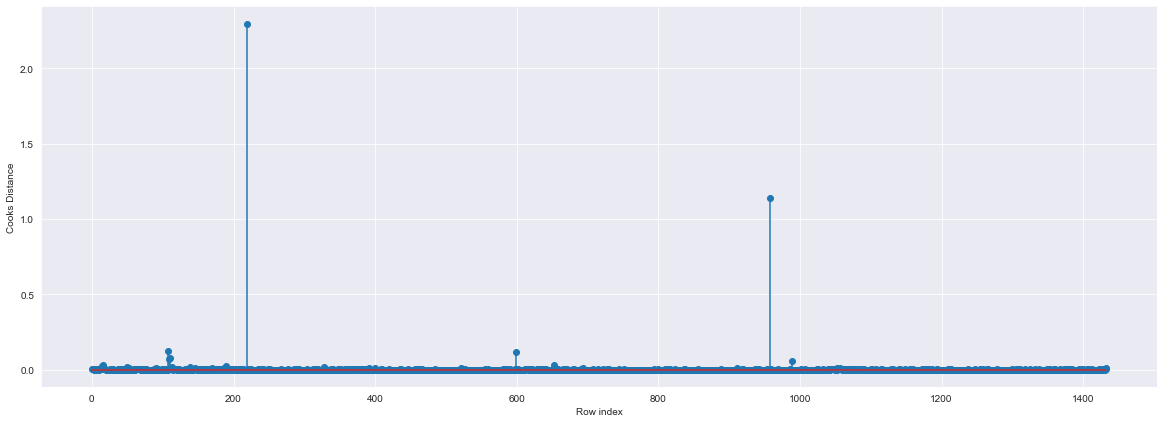

In [90]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(dataT5)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [91]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(219, 2.2983099538514606)

In [92]:
#Drop 219 observations
dataT7=dataT5.drop(dataT5.index[[219]],axis=0)
dataT7

,Price,Age,KM,HP,cc,Doors,CC,Gears,Weight
0,13500,23,46986,90,2000,3,4,5,1165
1,13750,23,72937,90,2000,3,4,5,1165
2,13950,24,41711,90,2000,3,4,5,1165
3,14950,26,48000,90,2000,3,4,5,1165
4,13750,30,38500,90,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,4,5,1025
1430,10845,72,19000,86,1300,3,4,5,1015
1431,8500,71,17016,86,1300,3,4,5,1015
1432,7250,70,16916,86,1300,3,4,5,1015


In [93]:
#Reset the index and re arrange the row values
dataT8=dataT7.reset_index()

In [94]:
dataT9=dataT8.drop(['index'],axis=1)

In [95]:
dataT9

,Price,Age,KM,HP,cc,Doors,CC,Gears,Weight
0,13500,23,46986,90,2000,3,4,5,1165
1,13750,23,72937,90,2000,3,4,5,1165
2,13950,24,41711,90,2000,3,4,5,1165
3,14950,26,48000,90,2000,3,4,5,1165
4,13750,30,38500,90,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,4,5,1025
1429,10845,72,19000,86,1300,3,4,5,1015
1430,8500,71,17016,86,1300,3,4,5,1015
1431,7250,70,16916,86,1300,3,4,5,1015


In [96]:
dataT10= smf.ols('Price~HP+Age+KM+CC+cc+Doors+Gears+Weight',data = dataT9).fit()

In [97]:
dataT10.tvalues , np.round(dataT10.pvalues,5)

(Intercept    -9.349614
 HP           12.578941
 Age         -46.560534
 KM          -13.299185
 CC           -9.349614
 cc           -8.780311
 Doors        -1.898884
 Gears         2.914476
 Weight       24.054148
 dtype: float64,
 Intercept    0.00000
 HP           0.00000
 Age          0.00000
 KM           0.00000
 CC           0.00000
 cc           0.00000
 Doors        0.05778
 Gears        0.00362
 Weight       0.00000
 dtype: float64)

In [108]:
#R squared values
(dataT10.rsquared,dataT10.rsquared_adj)

(0.873771382961479, 0.8731513125619916)

In [99]:
model_influence_V = dataT10.get_influence()
(c_V, _) = model_influence_V.cooks_distance

<ipython-input-100-4adab6401fe4>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(dataT9)),np.round(c_V,3));


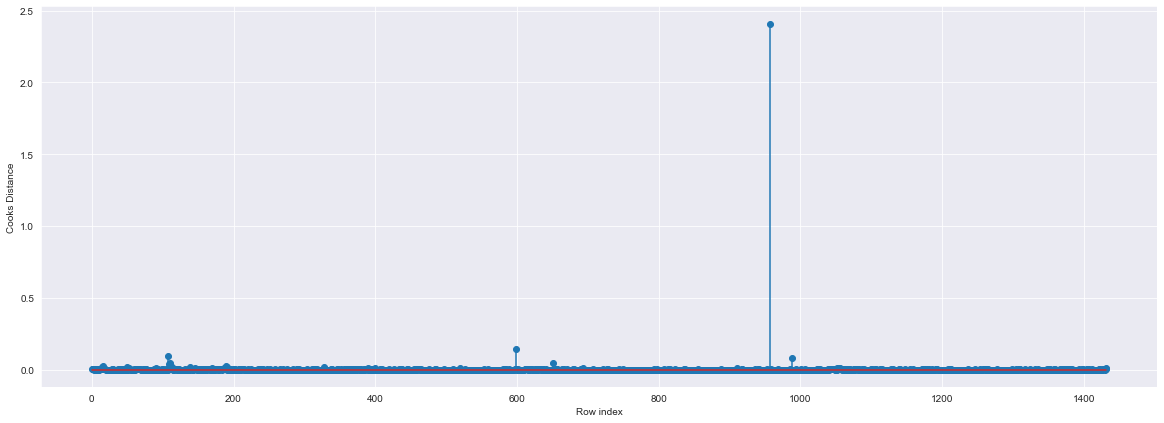

In [100]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(dataT9)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [101]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(957, 2.4085415697985173)

In [102]:
#Drop 957 observations
dataT11=dataT9.drop(dataT9.index[[957]],axis=0)
dataT11

,Price,Age,KM,HP,cc,Doors,CC,Gears,Weight
0,13500,23,46986,90,2000,3,4,5,1165
1,13750,23,72937,90,2000,3,4,5,1165
2,13950,24,41711,90,2000,3,4,5,1165
3,14950,26,48000,90,2000,3,4,5,1165
4,13750,30,38500,90,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,4,5,1025
1429,10845,72,19000,86,1300,3,4,5,1015
1430,8500,71,17016,86,1300,3,4,5,1015
1431,7250,70,16916,86,1300,3,4,5,1015


In [103]:
#Reset the index and re arrange the row values
dataT12=dataT11.reset_index()

In [104]:
dataT13=dataT12.drop(['index'],axis=1)

In [105]:
dataT13

,Price,Age,KM,HP,cc,Doors,CC,Gears,Weight
0,13500,23,46986,90,2000,3,4,5,1165
1,13750,23,72937,90,2000,3,4,5,1165
2,13950,24,41711,90,2000,3,4,5,1165
3,14950,26,48000,90,2000,3,4,5,1165
4,13750,30,38500,90,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...
1427,7500,69,20544,86,1300,3,4,5,1025
1428,10845,72,19000,86,1300,3,4,5,1015
1429,8500,71,17016,86,1300,3,4,5,1015
1430,7250,70,16916,86,1300,3,4,5,1015


In [106]:
Model14= smf.ols('Price~HP+Age+KM+CC+cc+Doors+Gears+Weight',data = dataT13).fit()

In [107]:
Model14.tvalues , np.round(Model14.pvalues,5)

(Intercept   -12.251211
 HP           13.009812
 Age         -45.125915
 KM          -13.764449
 CC          -12.251211
 cc          -11.897757
 Doors        -3.513394
 Gears         2.772320
 Weight       27.058472
 dtype: float64,
 Intercept    0.00000
 HP           0.00000
 Age          0.00000
 KM           0.00000
 CC           0.00000
 cc           0.00000
 Doors        0.00046
 Gears        0.00564
 Weight       0.00000
 dtype: float64)

In [109]:
#R squared values
(Model14.rsquared,Model14.rsquared_adj)

(0.8828097629775794, 0.8822336873742389)